# RFE - Prudential Life

## Importing Packages and loading into DF

In [1]:
from __future__ import print_function
import timeit

from sklearn.model_selection import learning_curve, ShuffleSplit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgboost
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

import sklearn.ensemble
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import log_loss, confusion_matrix, mean_squared_error, accuracy_score

import lime
import lime.lime_tabular

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [2]:
ins_data = './dataset/train.csv'
ins = pd.read_csv(ins_data)
# ins_test_data = './dataset/test.csv'
# ins_test = pd.read_csv(ins_test_data)

In [3]:
print(ins.shape)
# print(ins_test.shape)

(59381, 128)


## Cleaing Data
- Dropping Axis Column
- Creating dummy for column Product_Info_2 column
- Removing NaN values - where normally distributed, replacing with mean value, where other columns used meadian.

In [60]:
sorted(ins.Employment_Info_2.value_counts().index)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38]

In [4]:
ins.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [5]:
ins.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

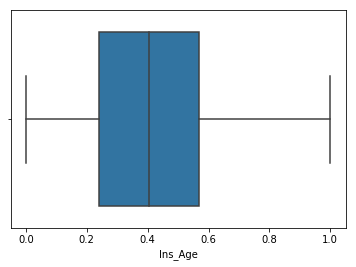

In [6]:
sns.boxplot(ins['Ins_Age'])

In [7]:
ins.drop('Id',axis=1,inplace=True)
# ins_test.drop('Id',axis=1,inplace=True)

In [8]:
ins.Product_Info_2.value_counts()
prod_2 = {'A1':1,'A2':2,'A3':3,'A4':4,'A5':5,'A6':6,'A7':7,'A8':8,'B1':9,'B2':10,'C1':11,'C2':12,
          'C3':13,'C4':14,'D1':15,'D2':16,'D3':17,'D4':18,'E1':19}

ins.replace({"Product_Info_2": prod_2},inplace=True)

In [9]:
for i in range(2,6):
    ins['Family_Hist_%i' % i].fillna(0,inplace=True)
#     ins_test['Family_Hist_%i' % i].fillna(0,inplace=True)

for i in [1,10,15,24,32]:
    ins['Medical_History_%i' % i].fillna(0,inplace=True)
#     ins_test['Medical_History_%i' % i].fillna(0,inplace=True)

for i in [1,4,6]:
    ins['Employment_Info_%i' % i].fillna(0,inplace=True)
#     ins_test['Employment_Info_%i' % i].fillna(0,inplace=True)

ins['Insurance_History_5'].fillna(0,inplace=True)
# ins_test['Insurance_History_5'].fillna(0,inplace=True)

## Creating X and y for modelling

In [10]:
for i in ins.columns:
    if str(ins[i].dtypes) == 'int64':
        ins[i] = ins[i].astype('int8')
    else:
        ins[i] = ins[i].astype('float16')

In [23]:
features = ins[['BMI','Medical_History_4','Medical_Keyword_15','Medical_Keyword_3','Medical_History_23',
                'Medical_History_15','Product_Info_4','Medical_History_40','Medical_History_30',
                'InsuredInfo_6','InsuredInfo_2','Medical_History_39','Medical_History_5','Medical_Keyword_38',
                'InsuredInfo_5','Medical_History_13','Insurance_History_2','Medical_History_24','Medical_History_27'
                ,'InsuredInfo_7']]

#Previously completed in notebook 2. Here testing how the performance is when I selent various numbers of the top features.
targets = ins.Response
targets = targets.map(lambda x: x-1)
X, X_holdout, y, y_holdout = train_test_split(features,targets, train_size = 0.8,test_size=0.2,random_state=77)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9,test_size=0.1,random_state=50)

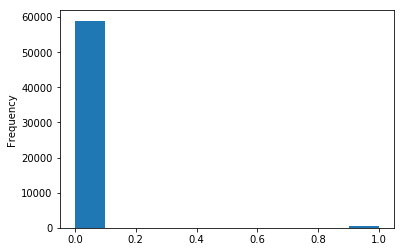

In [54]:
ins.Medical_Keyword_38.plot(kind='hist')

#### Determining Baseline

In [13]:
y_train.value_counts()

7    14028
5     8069
6     5821
1     4714
0     4489
4     3906
3     1003
2      723
Name: Response, dtype: int64

In [14]:
baseline=15637/len(y_train)
print(baseline)

0.36575211096297333


In [15]:
## general purpose function to test models.
def fit_model(alg):
    alg.fit(X_train,y_train)
    scores= cross_val_score(alg,X_train,y_train,cv=5,n_jobs=-1,verbose=1)
    ## calculate accuracy
    accuracy_score_test = alg.score(X_test,y_test)
    accuracy_score_train = alg.score(X_train,y_train)
    ## calculate log loss
    y_pred = alg.predict_proba(X_train)
    log_loss_train = log_loss(y_train,y_pred)
    y_pred = alg.predict_proba(X_test)
    log_loss_test = log_loss(y_test,y_pred)
    ## print values
    print('baseline: ',baseline)
    print("cv scores: ",scores)
    print("mean cv scores: ",np.mean(scores))
    print("std cv scores: ",np.std(scores))
    print('-------------------------------')
    print("accuracy score - train: ",accuracy_score_train)
    print("accuracy score - test: ",accuracy_score_test)
    print('-------------------------------')
    print("log loss score - train: ",log_loss_train)
    print("log loss score - test: ",log_loss_test)

The rest of the notebook is just running models like is notebook 2. The result was slightly lower accuracy when compared to using all features.

## KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=30,n_jobs=-1)
fit_model(knn)

C:\Users\Roy\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\Roy\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.9s remaining:   29.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.4s finished
C:\Users\Roy\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\Roy\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\Roy\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: 

baseline:  0.36575211096297333
cv scores:  [0.41875146 0.41288587 0.41054724 0.41326471 0.42160075]
mean cv scores:  0.41541000691531077
std cv scores:  0.004101478931804735
-------------------------------
accuracy score - train:  0.6348326433232756
accuracy score - test:  0.4089665333613976
-------------------------------
log loss score - train:  1.6890593085048007
log loss score - test:  12.28054561847877


Various results

CV - results (n_neighbors=4,leaf_size=30,n_jobs=3)

[0.31529109 0.31579563 0.31750672 0.31278512 0.31675638]
0.31562698836623093

CV - results (n_neighbors=5)

([0.29261164 0.29276277 0.30218688 0.29687683 0.29581091]
0.29604980581700885

## Logistic Regression

In [25]:
lr = LogisticRegression(multi_class='auto', solver = 'liblinear',max_iter=200)
fit_model(lr)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.3s remaining:   12.6s


baseline:  0.36575211096297333
cv scores:  [0.48725742 0.47789991 0.47556127 0.48052404 0.4796396 ]
mean cv scores:  0.48017644749419264
std cv scores:  0.00392509182438362
-------------------------------
accuracy score - train:  0.4813463382686595
accuracy score - test:  0.48600294674805306
-------------------------------
log loss score - train:  1.4197696975390914
log loss score - test:  1.4337926332815445


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.4s finished
C:\Users\Roy\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\Roy\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\Roy\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\Roy\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


CV Results - (multi_class='auto', solver = 'liblinear')

[0.49590835 0.49397872 0.49923985 0.49584747 0.49075591]
0.4951460599227767

In [23]:
y_train.value_counts(normalize=True)

7    0.328702
5    0.189624
6    0.136318
1    0.110144
0    0.102823
4    0.091081
3    0.024536
2    0.016771
Name: Response, dtype: float64

## SVM

In [ ]:
parameters = {'C':[0.001,0.25,0.5,0.75,1,10],
              'kernel':['linear','rbf'],
              'gamma':['scale',0.001,0.01,0.1,1,2,3],
              'decision_function_shape':['ovo','ovr']}

In [ ]:
svm = SVC(probability=True,random_state=42)
grid_search = GridSearchCV(svm,param_grid=parameters,cv=3,n_jobs=3)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [18]:
svm = SVC(C=1, kernel='rbf', gamma='scale',decision_function_shape='ovr',probability=True,random_state=42)

In [19]:
scores = cross_val_score(svm, X_train, y_train, cv=5,n_jobs=-1,verbose=1)
predictions = cross_val_predict(svm, X_train,y_train,cv=5,n_jobs=3)
r2 = metrics.r2_score(y_train, predictions)
print(scores)
print(scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 64.1min remaining: 96.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 64.3min finished


[0.36029928 0.36244593 0.3573851  0.35466136 0.35490288]
0.35793890883976404


CV Scores - (cv=5,n_jobs=-1,verbose=1)

[0.36029928 0.36244593 0.3573851  0.35466136 0.35490288]
0.35793890883976404

In [ ]:
svm.fit(X_train,y_train)
accuracy_score_train = grid_search.best_score_

accuracy_score_test = grid_search.score(X_test,y_test)

y_pred = grid_search.predict_proba(X_test)
log_loss_test = log_loss(y_test,y_pred)

y_pred = grid_search.predict_proba(X_train)
log_loss_train = log_loss(y_train,y_pred)

print('baseline: ',baseline)
print('-------------------------------')
print("accuracy score - train: ",accuracy_score_train)
print("accuracy score - test: ",accuracy_score_test)
print('-------------------------------')
print("log loss score - train: ",log_loss_train)
print("log loss score - test: ",log_loss_test)

Test 1
- C=0.001, kernel='rbf', gamma='scale',decision_function_shape='ovr',probability=True,random_state=42

## Random Forest

In [26]:
forest = RandomForestClassifier(max_depth=5,max_leaf_nodes=30,verbose=1)
fit_model(forest)

C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


baseline:  0.36575211096297333
cv scores:  [0.50946925 0.5047942  0.48351263 0.49105158 0.51053124]
mean cv scores:  0.49987178212588307
std cv scores:  0.01072738131344724
-------------------------------
accuracy score - train:  0.49760250742637946
accuracy score - test:  0.4963165649336982
-------------------------------
log loss score - train:  1.4170993877551938
log loss score - test:  1.4230289774027929


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


CV Results (max_depth=5,max_leaf_nodes=30,class_weight='balanced',verbose=1)

[0.42646715 0.41190226 0.42673372 0.40905369 0.41048444]
0.4169282498796433

CV Results (max_depth=5,max_leaf_nodes=30,verbose=1)

[0.44201543 0.44557465 0.46099871 0.43853082 0.4678212 ]
0.4509881644734108

In [27]:
forest_features = pd.DataFrame()
forest_features['feature'] = X.columns
forest_features['importance'] = forest.feature_importances_
forest_features.sort_values('importance',ascending=False).head(10)

,feature,importance
8,BMI,0.260038
90,Medical_Keyword_15,0.192172
57,Medical_History_23,0.100389
38,Medical_History_4,0.098857
3,Product_Info_4,0.090573
7,Ins_Age,0.047791
49,Medical_History_15,0.040456
20,InsuredInfo_6,0.022139
78,Medical_Keyword_3,0.020943
64,Medical_History_30,0.012430


## XGBoost

In [15]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.01,max_depth= 7,eta= 0.1,verbosity= 1,objective= 'multi:softprob',num_class= 7,reg_lambda=0)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train,y_train,eval_metric=['merror','mlogloss'],eval_set=eval_set, verbose=True)

[0]	validation_0-merror:0.446425	validation_0-mlogloss:1.96987	validation_1-merror:0.443486	validation_1-mlogloss:1.97088
[1]	validation_0-merror:0.44432	validation_0-mlogloss:1.88228	validation_1-merror:0.441591	validation_1-mlogloss:1.88458
[2]	validation_0-merror:0.442144	validation_0-mlogloss:1.81038	validation_1-merror:0.441591	validation_1-mlogloss:1.81396
[3]	validation_0-merror:0.443688	validation_0-mlogloss:1.74866	validation_1-merror:0.441381	validation_1-mlogloss:1.75383
[4]	validation_0-merror:0.442144	validation_0-mlogloss:1.69555	validation_1-merror:0.445169	validation_1-mlogloss:1.70229
[5]	validation_0-merror:0.440952	validation_0-mlogloss:1.6491	validation_1-merror:0.446853	validation_1-mlogloss:1.65723
[6]	validation_0-merror:0.439478	validation_0-mlogloss:1.60783	validation_1-merror:0.44538	validation_1-mlogloss:1.61735
[7]	validation_0-merror:0.437466	validation_0-mlogloss:1.57151	validation_1-merror:0.445169	validation_1-mlogloss:1.58271
[8]	validation_0-merror:0.4

[67]	validation_0-merror:0.390218	validation_0-mlogloss:1.12635	validation_1-merror:0.421174	validation_1-mlogloss:1.21185
[68]	validation_0-merror:0.38975	validation_0-mlogloss:1.12447	validation_1-merror:0.421174	validation_1-mlogloss:1.21105
[69]	validation_0-merror:0.389259	validation_0-mlogloss:1.12291	validation_1-merror:0.421385	validation_1-mlogloss:1.21026
[70]	validation_0-merror:0.388791	validation_0-mlogloss:1.1212	validation_1-merror:0.420964	validation_1-mlogloss:1.20956
[71]	validation_0-merror:0.388487	validation_0-mlogloss:1.11987	validation_1-merror:0.420333	validation_1-mlogloss:1.2091
[72]	validation_0-merror:0.387832	validation_0-mlogloss:1.11769	validation_1-merror:0.420964	validation_1-mlogloss:1.20826
[73]	validation_0-merror:0.387154	validation_0-mlogloss:1.11632	validation_1-merror:0.420122	validation_1-mlogloss:1.20755
[74]	validation_0-merror:0.386827	validation_0-mlogloss:1.11505	validation_1-merror:0.420333	validation_1-mlogloss:1.20705
[75]	validation_0-m

XGBClassifier(alpha=0.8, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, eta=0.1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_class=7, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=50, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbosity=1)

In [38]:
model = XGBClassifier(n_estimators=90,max_depth=6,min_child_weight=5,eta=0.01,verbosity= 1,colsample_bytree=0.5,objective= 'multi:softprob',num_class= 8)
scores = cross_val_score(model, X_train, y_train, cv=5,n_jobs=-1,verbose=1)
predictions = cross_val_predict(model, X_train,y_train,cv=5,n_jobs=3)
r2 = metrics.r2_score(y_train, predictions)
print(scores)
print(scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished


[0.5748188  0.57792587 0.57572214 0.56883846 0.57102738]
0.5736665303633456


CV Results - XGBClassifier(max_depth= 7,eta= 0.1,verbosity= 1,objective= 'multi:softprob',num_class=8,alpha=0.8,reg_lambda=50)

[0.57657236 0.57780896 0.57595603 0.56743479 0.56938919]
0.5734322647763243

CV Results - n_estimators=90,max_depth=5,eta=0.1,verbosity= 1,colsample_bytree=0.5,objective= 'multi:softprob',num_class= 8,reg_lambda=0

[0.57610475 0.57359991 0.57595603 0.56392561 0.57126141]
0.572169539099591

n_estimators=90,max_depth=5,eta=0.01,verbosity= 1,colsample_bytree=0.5,objective= 'multi:softprob',num_class= 8,reg_lambda=0)

[0.57610475 0.57359991 0.57595603 0.56392561 0.57126141]
0.572169539099591

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

### XGBoost - Grid Search for Best Parameters

In [35]:
parameters = {'max_depth':[4,5,6,7,8,9],
              'lerning_rate':[0.01,0.05,0.1,1],
              'gamma':[0,1],
              'min_child_weight':[1,5,10,50,100]}

In [36]:
model = XGBClassifier(n_estimators=90,colsample_bytree=0.5,verbosity= 1,objective= 'multi:softprob',num_class= 8)
grid_search = GridSearchCV(model,param_grid=parameters,cv=5,n_jobs=-1)
grid_search.fit(X_test,y_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=90,
       n_jobs=1, nthread=None, num_class=8, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 5, 6, 7, 8, 9], 'lerning_rate': [0.01, 0.05, 0.1, 1], 'gamma': [0, 1], 'min_child_weight': [1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
grid_search.best_params_

{'gamma': 1, 'lerning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 5}

### XGBoost - Further tuning to reduce overfitting

In [29]:
xgb = XGBClassifier(n_estimators=100,max_depth=6,subsample=0.8,min_child_weight=5,eta=0.02,verbosity= 1,
                    colsample_bytree=0.6,objective= 'multi:softprob',num_class= 8,gamma=1,reg_lambda=10,reg_alpha=4)
fit_model(xgb)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   39.3s remaining:   59.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   42.0s finished


baseline:  0.36575211096297333
cv scores:  [0.56277765 0.553087   0.55168382 0.55199439 0.5567517 ]
mean cv scores:  0.5552589087474359
std cv scores:  0.004169303314853838
-------------------------------
accuracy score - train:  0.5669777559469511
accuracy score - test:  0.5609345400968218
-------------------------------
log loss score - train:  1.2362936050901552
log loss score - test:  1.2659841369444684


## Extra Trees

In [30]:
extra_tree = ExtraTreesClassifier(max_depth=8,max_features=3,
                                 bootstrap=True,n_jobs=-1,
                                 random_state=1,verbose=1)
fit_model(extra_tree)

C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


baseline:  0.36575211096297333
cv scores:  [0.45300444 0.4232928  0.45989242 0.45981986 0.45436462]
mean cv scores:  0.45007482783889924
std cv scores:  0.013679275949059112
-------------------------------
accuracy score - train:  0.45959347882019974
accuracy score - test:  0.45695643022521576
-------------------------------
log loss score - train:  1.4849716254873744
log loss score - test:  1.4982930537380021


## SMOTE 
- Did not  seem to improve results

In [24]:
smt=SMOTE(k_neighbors=5)
X2_train,y2_train = smt.fit_sample(X_train,y_train)
np.bincount(y2_train)

array([    0, 14053, 14053, 14053, 14053, 14053, 14053, 14053, 14053],
      dtype=int64)

In [25]:
model2 = XGBClassifier(n_estimators=100,max_depth=5,eta=0.01,verbosity= 1,colsample_bytree=0.7,objective= 'multi:softprob',num_class= 8,reg_lambda=0,n_jobs=-1)
scores = cross_val_score(model2, X_train, y_train, cv=5,n_jobs=3,verbose=1)
predictions = cross_val_predict(model2, X_train,y_train,cv=5,n_jobs=3)
r2 = metrics.r2_score(y_train, predictions)
print(scores)
print(scores.mean())

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.2min finished


[0.57598784 0.57476909 0.5753713  0.56614809 0.5711444 ]
0.5726841425903546


## RFE Attempt
- took a while to run and was not able to finish

In [31]:
from sklearn.feature_selection import RFE
estimator = XGBClassifier(n_estimators=100,max_depth=5,eta=0.01,verbosity= 1,colsample_bytree=0.7,objective= 'multi:softprob',num_class= 8,reg_lambda=0,n_jobs=-1)
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X,y)

print(selector.supports_)
print(selector.ranking_)


KeyboardInterrupt: 